# Star Wars Retention ABC Experiment

* A: Thank you calls + emails
* B: Telemarketing calls + emails
* C: Just emails

The goal of these is to drive a second ticket purchase. These experiments are run against our new to file list for the Star Wars concert that occurred on August 17th, 2019.

In [2]:
import os
import pandas as pd
import numpy as np
from numpy.random import beta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

### Globals

In [45]:
N_SAMPLES = 1000000 # number of monte carlo sims
PRIOR_A = 1.0 # no prior assumptions made
PRIOR_B = 1.0 # no prior assumptions made
PRIOR_C = 1.0 # no prior assumptions made
PATH_DATA = 'U://projects/ab_experiments/star_wars_retention_experiment/data'
STAR_WARS_CONCERT_DATE = pd.to_datetime('8/17/2019 20:00:00')

### Data Imports

#### Experiment List Data

In [26]:
lists = pd.read_csv(PATH_DATA + '/experiments_lists.csv')

In [35]:
list_a = set(lists.loc[lists['experiment'] == 'A']['customer_no'])
list_b = set(lists.loc[lists['experiment'] == 'B']['customer_no'])
list_c = set(lists.loc[lists['experiment'] == 'C']['customer_no'])

#### Ticking Data

In [10]:
df = pd.read_csv(PATH_DATA + '/clx_pop_smr_8-19.csv', skiprows=3)

Drop no purchase seats (Order date is NA)

In [17]:
df.dropna(subset=['order_dt'], inplace=True)

Convert order date to datetime

In [23]:
df['order_dt'] = pd.to_datetime(df['order_dt'])

Drop rows where order date is prior to Star Wars concert date

In [25]:
df_post_star_wars = df.loc[df['order_dt'] > STAR_WARS_CONCERT_DATE]

Keep only customer number

In [34]:
cust_post_strwrs = set(df_post_star_wars.customer_no)

### Conversions

Conversions are measured as customers making a follow up ticket purchase. If a customer were to make a subscription purchase or if a customer were to make a multiple single ticket purchases or just one ticket for an upcoming concert, they are all equal to one conversion.

In [40]:
a_conversions = len(list_a) - len(list_a - cust_post_strwrs)
b_conversions = len(list_b) - len(list_b - cust_post_strwrs)
c_conversions = len(list_c) - len(list_c - cust_post_strwrs)

### Observed Results

In [52]:
# A experiment
A_successes = a_conversions
A_failures = len(list_a) - A_successes

# B experiment
B_successes = b_conversions
B_failures = len(list_b) - B_successes

# C experiment
C_successes = c_conversions
C_failures = len(list_c) - C_successes

Monte Carlo for beta distribution - we are using 1 for our priors. This is because we are assuming no prior knowledge or expectation but include a 1 to guarantee a result greater than 1.

In [54]:
A_posterior = beta(A_successes + 1,
                  A_failures + 1,
                  N_SAMPLES)

B_posterior = beta(B_successes + 1,
                  B_failures + 1,
                  N_SAMPLES)

C_posterior = beta(C_successes + 1,
                  C_failures + 1,
                  N_SAMPLES)

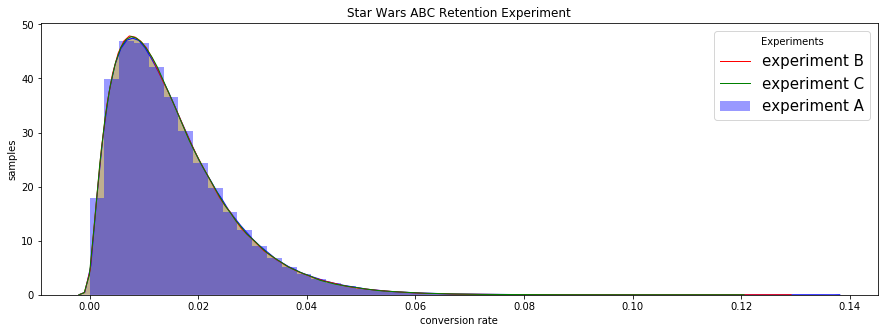

In [56]:
# Plot setup
plt.figure(figsize=[15,5])

# Plotting data
sns.distplot(A_posterior, hist=True, kde=True,
            color='blue', kde_kws={'linewidth':1},
            label='experiment A')
sns.distplot(B_posterior, hist=False, kde=True,
            color='red', kde_kws={'shade': True,'linewidth': 1},
            label='experiment B')
sns.distplot(C_posterior, hist=False, kde=True,
            color='green', kde_kws={'shade': True,'linewidth': 1},
            label='experiment C')

# Plotting formatting
plt.legend(prop={'size': 15}, title='Experiments')
plt.title('Star Wars ABC Retention Experiment')
plt.xlabel('conversion rate')
plt.ylabel('samples')
plt.show()